#### Dreem Challenge

# Data import and features computation

In [1]:
%run tool_factory
setup_environment()

from imports import *
from features import *

Setup environment... done!


## Importing the raw data

In [12]:
train_set = h5py.File('dreem-sleep-stages-2020/X_train.h5', 'r')
train_labels = pd.read_csv('dreem-sleep-stages-2020/y_train.csv')
test_set = h5py.File('dreem-sleep-stages-2020/X_test.h5', 'r')

keys = list(train_set.keys())

dbs = {key : np.array(train_set.get(key)) for key in keys}
dbs_test = {key : np.array(test_set.get(key)) for key in keys}
#x_train = pd.DataFrame(dbs['index'])

In [13]:
eegs = ['eeg_{}'.format(i) for i in range(1,8)]
biomarkers = eegs + ['pulse', 'x', 'y', 'z']

## First look at the data

There are no NaN values in the dataset. It might be the case in the test set, so we will also have to check that when we make predictions.

The output is a label between 0 and 4

- 0 Wake
- 1 NREM1 Sleep (light sleep 1)
- 2 NREM2 Sleep (light sleep 2)
- 3 NREM3 sleep (deep sleep)
- 4 REM sleep (paradoxical sleep)

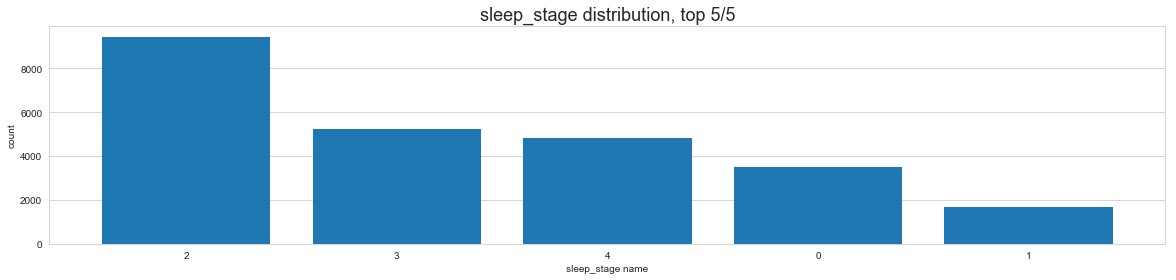

In [14]:
plot_categorical_distribution(train_labels, col='sleep_stage', n_x=5, rot=0)

The dataset is imbalanced. There are far more instances of light sleep 2 than light sleep 1 or wake.

It would also be interesting to take into account the variability between patients to make sure the model is only learning general behaviors and not patient specific ones. 

## Features extraction 

In [15]:
def compute_features(database, biomarkers):
    """
    """
    
    val = []
    nme = []
    eegs = ['eeg_{}'.format(i) for i in range(1,8)]
    
    for marker in biomarkers:
        # basic features
        res, names = basic_signal_features(database[marker], signal_name=marker)
        
        # chaos features
        chaos_res, chaos_names = chaos_features(database[marker], signal_name=marker)
        
        # frequency_features
        eeg_sig = marker in eegs
        freq_res, freq_names = frequency_features(database[marker], signal_name=marker, eeg_sig=eeg_sig)
        
        res += chaos_res
        res += freq_res
        names += chaos_names
        names += freq_names
        
        val += res
        nme += names
           
    dist_df = euclidean_distance_eeg(database, eegs)
    feature_df = pd.DataFrame(np.vstack(val).T, columns=nme)
    
    return pd.concat([feature_df, dist_df], axis=1)

In [16]:
data_train = compute_features(dbs, biomarkers)
data_test = compute_features(dbs_test, biomarkers=biomarkers)

Sampling frequency is 50 Hz
Sampling frequency is 50 Hz
Sampling frequency is 50 Hz
Sampling frequency is 50 Hz
Sampling frequency is 50 Hz
Sampling frequency is 50 Hz
Sampling frequency is 50 Hz
Sampling frequency is 10 Hz
Sampling frequency is 10 Hz
Sampling frequency is 10 Hz
Sampling frequency is 10 Hz
Sampling frequency is 50 Hz
Sampling frequency is 50 Hz
Sampling frequency is 50 Hz
Sampling frequency is 50 Hz
Sampling frequency is 50 Hz
Sampling frequency is 50 Hz
Sampling frequency is 50 Hz
Sampling frequency is 10 Hz
Sampling frequency is 10 Hz
Sampling frequency is 10 Hz
Sampling frequency is 10 Hz


In [18]:
print(data_train.isnull().values.any())
print(data_test.isnull().values.any())

False
False


In [ ]:
data_train.to_csv('', header=True, index=False)
data_test.to_csv('', header=True, index=False)